In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   sklearn.linear_model import LogisticRegression, LinearRegression

In [2]:
df = pd.read_csv('WHOclean-final.csv')

In [3]:
df.head()

,country,status,life_expectancy,adult_mortality,percentage_expenditure,hiv/aids,income_composition_of_resources,schooling
0,Afghanistan,0.0,58.19375,269.0625,34.960110,0.10000,0.415375,8.21250
1,Albania,0.0,75.15625,45.0625,193.259091,0.10000,0.709875,12.13750
2,Algeria,0.0,73.61875,108.1875,236.185241,0.10000,0.694875,12.71250
3,Angola,0.0,49.01875,328.5625,102.100268,2.36875,0.458375,8.04375
4,Antigua and Barbuda,0.0,75.05625,127.5000,1001.585226,0.12500,0.488625,8.84375


In [4]:
#transform output variable
df = df.sort_values(by=['hiv/aids'])
#df = df.loc[df['hiv/aids']>0.1]
log_school = np.log(df['hiv/aids'])


#relationship
linear = LinearRegression().fit(df[['schooling']], log_school)
lam = linear.coef_[0]
c = linear.intercept_
#df = df.sort_values(by=['schooling'])
school_prediction = np.exp(c) * np.exp(lam*df['schooling'])

#results
print('Coefficient:', lam)
print('Intercept:', c)
print('r^2:', linear.score(df[['schooling']], log_school))

Coefficient: -0.2981110964371132
Intercept: 2.4091226762897286
r^2: 0.327673170770289


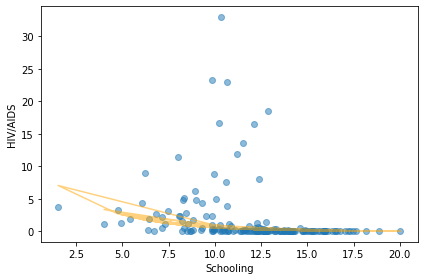

In [5]:
plt.scatter(df['schooling'], df['hiv/aids'], alpha=0.5)   # observed data
plt.plot(df['schooling'], school_prediction, c='orange', alpha=0.5) # predicted data
plt.xlabel('Schooling')
plt.ylabel('HIV/AIDS')
plt.tight_layout()
plt.show()